In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [ ]:
yt = label_binarize(target, classes=[0, 1, 2])
n_classes = yt.shape[1]
X_train,X_test,Y_train,Y_test =train_test_split(features,target,test_size=0.60,random_state=0)

# Voting Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
voting='hard')
voting_clf.fit(X_train, Y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [ ]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, Y_train)
  Y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(Y_test, Y_pred))

LogisticRegression 0.9444444444444444
RandomForestClassifier 0.9555555555555556
SVC 0.9333333333333333
VotingClassifier 0.9333333333333333


In [ ]:
svm_clf = SVC(probability = True)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf',
rnd_clf), ('svc', svm_clf)], voting='soft')

# BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),
n_estimators=500, max_samples=50, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, Y_train)
Y_pred = bag_clf.predict(X_test)
print(bag_clf.__class__.__name__, accuracy_score(Y_test, Y_pred))

BaggingClassifier 0.9555555555555556


# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, Y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
stratify=Y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, Y_train)
Y_pred = forest.predict(X_test)
print(forest.__class__.__name__, accuracy_score(Y_test, Y_pred))

RandomForestClassifier 0.92


In [ ]:
pip install mglearn

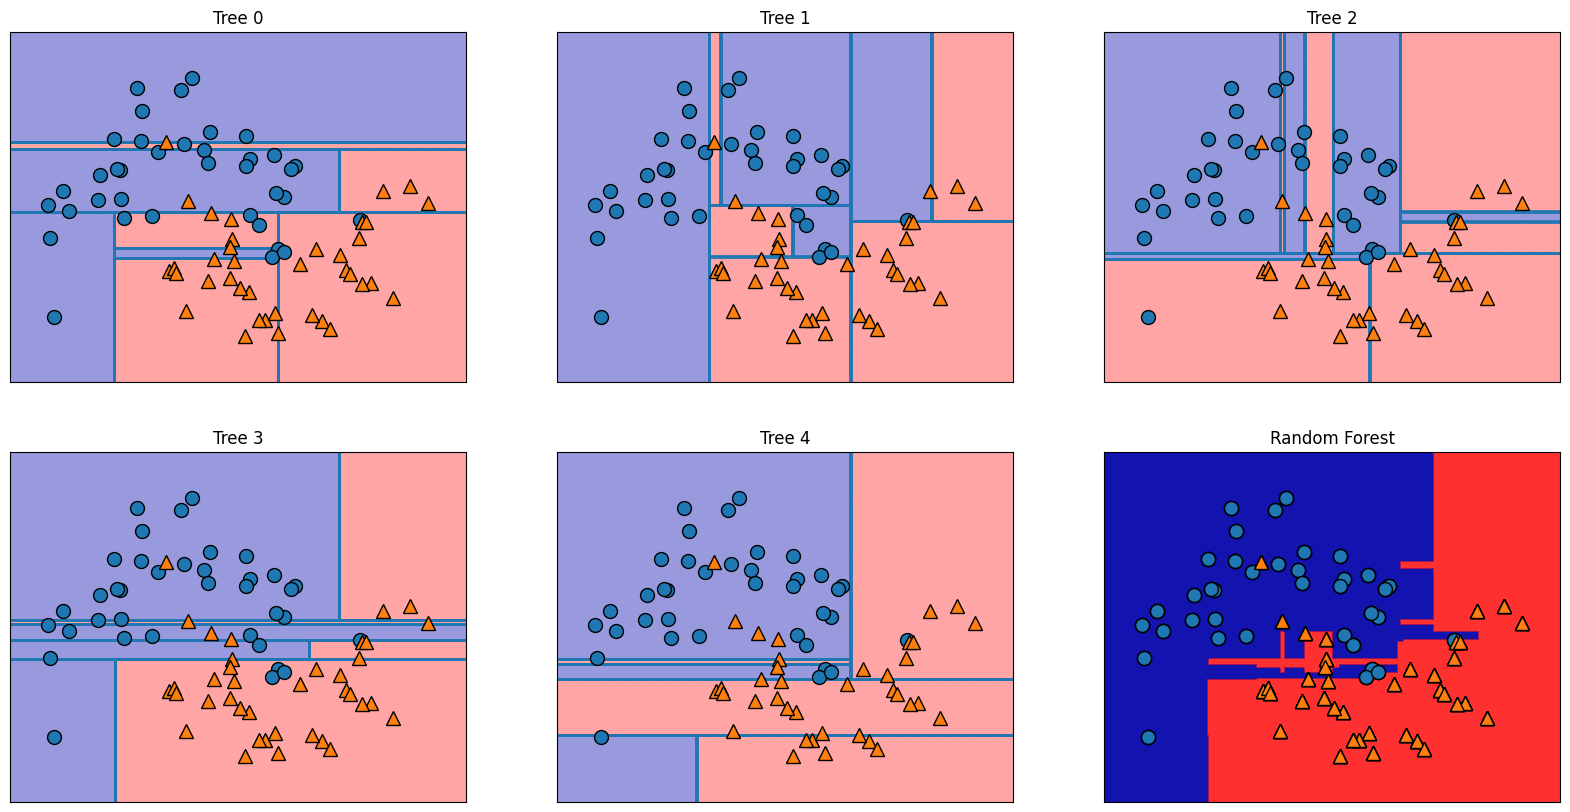

In [ ]:
import matplotlib.pyplot as plt
import mglearn
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(),
  forest.estimators_)):
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(X_train, Y_train, tree, ax=ax)
  mglearn.plots.plot_2d_separator(forest, X_train, fill=True,
  ax=axes[-1, -1],alpha=.4)
  axes[-1, -1].set_title("Random Forest")
  mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], Y_train)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create random forest classifier object

randomforest = RandomForestClassifier(n_estimators=100,random_state=0, n_jobs=-1)
# Train model
model = randomforest.fit(X_train, Y_train)

In [ ]:
model.predict(X_test)
print("Accuracy on training set: {:.3f}".format(model.score(X_train,
Y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test,
Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.880


In [ ]:
randomforest_entropy = RandomForestClassifier(criterion="entropy",
random_state=0)
# Train model
model_entropy = randomforest_entropy.fit(X_train, Y_train)
model_entropy.predict(X_test)
print("Accuracy on training set: {:.3f}".format(model_entropy.score(X_train,
Y_train)))
print("Accuracy on test set: {:.3f}".format(model_entropy.score(X_test,
Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.920


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Boston_Dataset.csv to Boston_Dataset (1).csv


# RANDOM FOREST REGRESSOR

In [ ]:
# Load libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
import pandas as pd
# Load data with only two features
boston = pd.read_csv('Boston_Dataset.csv')
features = boston.drop('PRICE', axis = 1)
target = boston['PRICE']
X_train,X_test,Y_train,Y_test =train_test_split(features,target,test_size=0.60,random_state=0)
# Create random forest classifier object
randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)
# Train model
model = randomforest.fit(X_train, Y_train)
model.predict(X_test)
print("Accuracy on training set: {:.3f}".format(model.score(X_train,
Y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test,
Y_test)))

Accuracy on training set: 0.981
Accuracy on test set: 0.801


# Ada Boost Regressor


In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostRegressor
# Create adaboost tree classifier object
adaboost = AdaBoostRegressor(random_state=0)
# Train model
model = adaboost.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Accuracy on training set: {:.3f}".format(model.score(X_train,
Y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test,
Y_test)))

Accuracy on training set: 0.946
Accuracy on test set: 0.749


# GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(random_state=0)
gbrt.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, Y_test)))

Accuracy on training set: 0.992
Accuracy on test set: 0.813


## Q2.

In [7]:

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [22]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
import pandas as pd

iris = fetch_ucirepo(id=53)

iris_X = iris.data.features
iris_y = iris.data.targets

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(iris_X, iris_y, test_size=0.2, random_state=42)

rf_iris = RandomForestClassifier().fit(X_train_iris, y_train_iris)
y_pred_iris = rf_iris.predict(X_test_iris)
print("\nRandom Forest Classifier")
print(classification_report(y_test_iris, y_pred_iris))

rf_iris = VotingClassifier(estimators=[('rf', RandomForestClassifier())]).fit(X_train_iris, y_train_iris)
y_pred_iris = rf_iris.predict(X_test_iris)
print("\nHard voting Classifier")
print(classification_report(y_test_iris, y_pred_iris))

rf_iris = VotingClassifier(voting='soft', estimators=[('rf', RandomForestClassifier())]).fit(X_train_iris, y_train_iris)
y_pred_iris = rf_iris.predict(X_test_iris)
print("\nSoft voting Classifier")
print(classification_report(y_test_iris, y_pred_iris))

rf_iris = BaggingClassifier(n_estimators=10).fit(X_train_iris, y_train_iris)
y_pred_iris = rf_iris.predict(X_test_iris)
print("\n10 Bagging Classifier")
print(classification_report(y_test_iris, y_pred_iris))

rf_iris = BaggingClassifier(n_estimators=50).fit(X_train_iris, y_train_iris)
y_pred_iris = rf_iris.predict(X_test_iris)
print("\n50 Bagging Classifier")
print(classification_report(y_test_iris, y_pred_iris))

rf_iris = BaggingClassifier(n_estimators=100).fit(X_train_iris, y_train_iris)
y_pred_iris = rf_iris.predict(X_test_iris)
print("\n100 Bagging Classifier")
print(classification_report(y_test_iris, y_pred_iris))

rf_iris = AdaBoostClassifier(n_estimators=10).fit(X_train_iris, y_train_iris)
y_pred_iris = rf_iris.predict(X_test_iris)
print("\n10 AdaBoost Classifier")
print(classification_report(y_test_iris, y_pred_iris))

rf_iris = GradientBoostingClassifier(n_estimators=10).fit(X_train_iris, y_train_iris)
y_pred_iris = rf_iris.predict(X_test_iris)
print("\n10 GradientBoostingRegressor")


Random Forest Classifier
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Hard voting Classifier
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Soft voting Classifier
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-ve

In [23]:
wine = fetch_ucirepo(id=109)

wine_X = wine.data.features
wine_y = wine.data.targets

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(wine_X, wine_y, test_size=0.2, random_state=42)
rf_wine = RandomForestClassifier().fit(X_train_wine, y_train_wine)
y_pred_wine = rf_wine.predict(X_test_wine)
print("\nRandom Forest Classifier")
print(classification_report(y_test_wine, y_pred_wine))

rf_wine = VotingClassifier(estimators=[('rf', RandomForestClassifier())]).fit(X_train_wine, y_train_wine)
y_pred_wine = rf_wine.predict(X_test_wine)
print("\nHard voting Classifier")
print(classification_report(y_test_wine, y_pred_wine))

rf_wine = VotingClassifier(voting='soft', estimators=[('rf', RandomForestClassifier())]).fit(X_train_wine, y_train_wine)
y_pred_wine = rf_wine.predict(X_test_wine)
print("\nSoft voting Classifier")
print(classification_report(y_test_wine, y_pred_wine))

rf_wine = BaggingClassifier(n_estimators=10).fit(X_train_wine, y_train_wine)
y_pred_wine = rf_wine.predict(X_test_wine)
print("\n10 Bagging Classifier")
print(classification_report(y_test_wine, y_pred_wine))

rf_wine = BaggingClassifier(n_estimators=50).fit(X_train_wine, y_train_wine)
y_pred_wine = rf_wine.predict(X_test_wine)
print("\n50 Bagging Classifier")
print(classification_report(y_test_wine, y_pred_wine))

rf_wine = BaggingClassifier(n_estimators=100).fit(X_train_wine, y_train_wine)
y_pred_wine = rf_wine.predict(X_test_wine)
print("\n100 Bagging Classifier")
print(classification_report(y_test_wine, y_pred_wine))

rf_wine = AdaBoostClassifier(n_estimators=10).fit(X_train_wine, y_train_wine)
y_pred_wine = rf_wine.predict(X_test_wine)
print("\n10 AdaBoost Classifier")
print(classification_report(y_test_wine, y_pred_wine))

rf_wine = GradientBoostingClassifier(n_estimators=10).fit(X_train_wine, y_train_wine)
y_pred_wine = rf_wine.predict(X_test_wine)
print("\n10 GradientBoostingRegressor")
print(classification_report(y_test_wine, y_pred_wine))


Random Forest Classifier
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Hard voting Classifier
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Soft voting Classifier
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
 

## Q5.

In [24]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, recall_score, precision_score, f1_score
from ucimlrepo import fetch_ucirepo

wave = fetch_ucirepo(id=107)

wave_X = wave.data.features
wave_y = wave.data.targets

X_train_wave, X_test_wave, y_train_wave, y_test_wave = train_test_split(wave_X, wave_y, test_size=0.4, random_state=42)

rf_wave = RandomForestRegressor().fit(X_train_wave, y_train_wave)
y_pred_wave = rf_wave.predict(X_test_wave)
print("\nRandom Forest Regressor")
print("R2 score:", r2_score(y_test_wave, y_pred_wave))
print("Mean squared error:", mean_squared_error(y_test_wave, y_pred_wave))


Random Forest Classifier
R2 score: 0.6343541937998498
Mean squared error: 0.24039154999999998


In [26]:
path = kagglehub.dataset_download("shubhankartiwari/ram-prices")
ram = pd.read_csv(path + '/ram_price.csv')

ram_X = ram[['date']]
ram_y = ram[['price']]

X_train_ram, X_test_ram, y_train_ram, y_test_ram = train_test_split(ram_X, ram_y, test_size=0.4, random_state=42)
rf_ram = RandomForestRegressor().fit(X_train_ram, y_train_ram)
y_pred_ram = rf_ram.predict(X_test_ram)
print("\nRandom Forest Regressor")
print("R2 score:", r2_score(y_test_ram, y_pred_ram))
print("Mean squared error:", mean_squared_error(y_test_ram, y_pred_ram))


Random Forest Regressor
R2 score: -116.67265886004502
Mean squared error: 6416015449336.689


In [28]:
path = kagglehub.dataset_download("schirmerchad/bostonhoustingmlnd")
boston = pd.read_csv(path + '/housing.csv')

boston_X = boston.drop(columns=['RM'])
boston_y = boston[['RM']]
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(boston_X, boston_y, test_size=0.4, random_state=42)
rf_boston = RandomForestRegressor().fit(X_train_boston, y_train_boston)
y_pred_boston = rf_boston.predict(X_test_boston)
print("\nRandom Forest Regressor")
print("R2 score:", r2_score(y_test_boston, y_pred_boston))
print("Mean squared error:", mean_squared_error(y_test_boston, y_pred_boston))


Random Forest Regressor
R2 score: 0.5669897026650454
Mean squared error: 0.17118905925663255
